In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import re

In [4]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00007735_041.png,Effusion,41,7735,32,M,AP,2500,2048,0.168,0.168,NaN
1,00011618_011.png,Atelectasis,11,11618,23,F,AP,2500,2048,0.168,0.168,NaN
2,00003535_001.png,No Finding,1,3535,18,F,AP,3056,2544,0.139,0.139,NaN
3,00016587_010.png,Pneumothorax,10,16587,48,F,PA,2658,2991,0.143,0.143,NaN
4,00018237_001.png,No Finding,1,18237,34,F,PA,2992,2991,0.143,0.143,NaN


Recojo las imagenes que ya tenemos

In [4]:
p_already = '/home/mr1142/Documents/Data/segmentation/images'
already = os.listdir(p_already)

In [5]:
len(already)

700

Cojo un numero de indices aleatorios, que no coincidan con las imagenes que ya tenemos

In [6]:
random = []
for i in range(200):
    rand=np.random.randint(0,len(df))
    while(df['Image Index'][rand] in already):
        rand=np.random.randint(0,len(df))
    random.append(rand)

In [7]:
set(list(df['Image Index'][random])).intersection(already)

set()

In [8]:
df = df.iloc[random].reset_index(drop=True)

In [9]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00017618_031.png,Mass,31,17618,36,M,AP,2500,2048,0.168,0.168,NaN
1,00001303_000.png,No Finding,0,1303,21,M,AP,2500,2048,0.168,0.168,NaN
2,00011955_002.png,Effusion|Infiltration,2,11955,54,F,PA,2398,2545,0.143,0.143,NaN
3,00003140_017.png,No Finding,17,3140,30,F,AP,2500,2048,0.168,0.168,NaN
4,00005806_006.png,Infiltration,6,5806,40,F,AP,2500,2048,0.168,0.168,NaN


In [10]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [11]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [12]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [13]:
for l in labels:
    print(l)
    print(sum(df[l] == 1))

Atelectasis
19
Cardiomegaly
6
Consolidation
8
Edema
5
Effusion
24
Emphysema
3
Hernia
2
Infiltration
33
Mass
9
No Finding
109
Nodule
14
Pleural_Thickening
5
Pneumonia
4
Pneumothorax
11


In [14]:
path = '/home/mr1142/Documents/Data/NIH'

In [15]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [16]:
images = list(map(charge_specific_img, df['Image Index']))

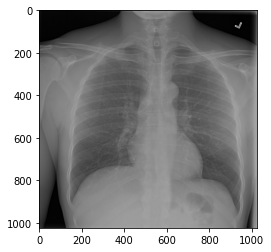

In [17]:
import matplotlib.pyplot as plt
i = np.random.randint(0,len(df))
plt.imshow(images[i])

In [18]:
len(images)

200

In [23]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/validacion_medica/NIH', df['Image Index'][i])
    cv2.imwrite(p, img)

## Creamos el dataframe

In [5]:
path = '/home/mr1142/Documents/Data/validacion_medica/NIH'
names = os.listdir(path)

In [6]:
len(names)

202

In [47]:
path = '/home/mr1142/Documents/Data/NIH/Data_Entry_2017.csv'

In [48]:
df = pd.read_csv(path)

In [49]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [50]:
index = [i for i in df.index if df['Image Index'][i] in names]

In [51]:
df = df.iloc[index]

In [52]:
df.to_csv('/home/mr1142/Documents/Data/validacion_medica/NIH/validation_data.csv')

# Montgomery dataset

In [13]:
path = '/home/mr1142/Documents/Data/montgomery_dataset/images'

In [14]:
images_name = os.listdir(path)

In [15]:
len(images_name)

139

# JSRT dataset

In [16]:
path = '/home/mr1142/Documents/Data/jsrt_dataset/images'

In [17]:
images_name = os.listdir(path)

In [18]:
len(images_name)

247